<a href="https://colab.research.google.com/github/adrianoracano/Prog-NAPDE/blob/main/prova_cn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [42]:
%cd /gdrive/My Drive

/gdrive/My Drive


In [43]:
!git clone https://github.com/adrianoracano/Prog-NAPDE.git

fatal: destination path 'Prog-NAPDE' already exists and is not an empty directory.


In [44]:
%cd /gdrive/My Drive/Prog-NAPDE

/gdrive/My Drive/Prog-NAPDE


In [45]:
import numpy as np
import tensorflow as tf
import math
import MyCrankNicolsonClass as cnc
from matplotlib import pyplot as plt

np.random.seed(123)
tf.random.set_seed(123)

## ODE-NN


In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)
tf.random.set_seed(123)

In [47]:
# initial condition
f0 = 1
# infinitesimal small number
inf_s = np.sqrt(np.finfo(np.float32).eps)

# Parameters
learning_rate = 0.01
training_steps = 500
batch_size = 100
display_step = training_steps/10

# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_output]))
}

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [48]:
# Create model
def multilayer_perceptron(x):
    x = np.array([[[x]]],  dtype='float32')
    # Hidden fully connected layer with 32 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden fully connected layer with 32 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Output fully connected layer
    output = tf.matmul(layer_2, weights['out']) + biases['out']
    return output

# Universal Approximator
def g(x):
    return x * multilayer_perceptron(x) + f0

# Given EDO
def f(x):
    return 2*x
    
# Custom loss function to approximate the derivatives
def custom_loss():
    summation = []
    for x in np.linspace(0,1,10):
        dNN = (g(x+inf_s)-g(x))/inf_s
        summation.append((dNN - f(x))**2)
    return tf.reduce_sum(tf.abs(summation))

In [49]:
def train_step():
    with tf.GradientTape() as tape:
        loss = custom_loss()
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [50]:
for i in range(training_steps):
    train_step()
    if i % display_step == 0:
        print("loss: %f " % (custom_loss()))

loss: 4216.851074 
loss: 4.348598 
loss: 4.212492 
loss: 4.128182 
loss: 4.046163 
loss: 3.928887 
loss: 3.629016 
loss: 1.611184 
loss: 0.089094 
loss: 0.018557 


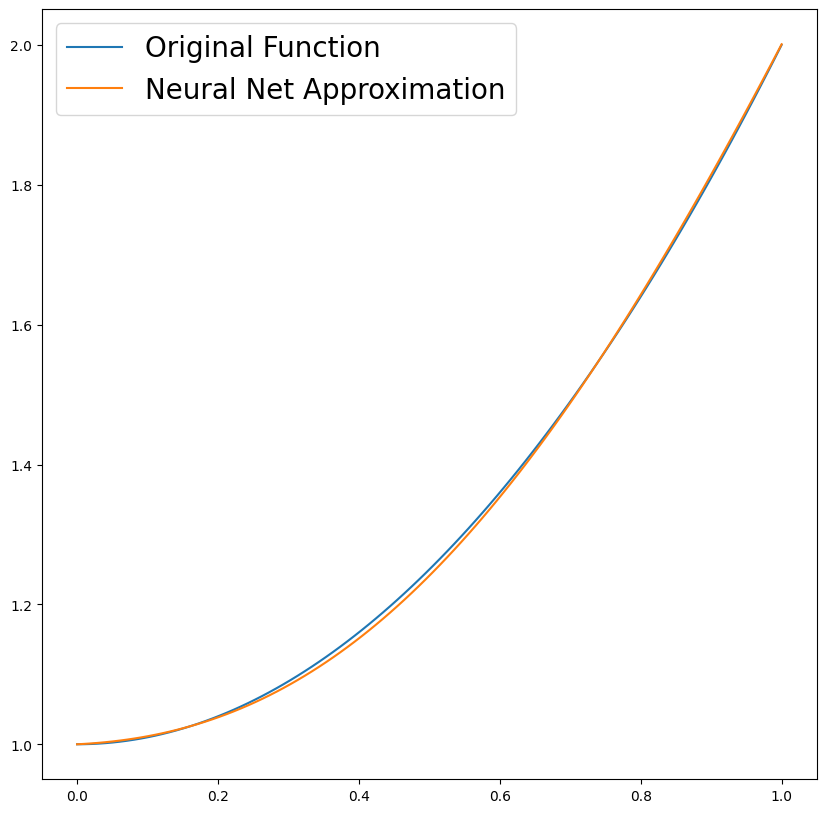

In [51]:
from matplotlib.pyplot import figure

figure(figsize=(10,10))
# True Solution (found analitically)
def true_solution(x):
    return x**2 + 1

X = np.linspace(0, 1, 100)
result = []
for i in X:
  # result.append(f(i))
  result.append(g(i).numpy()[0][0][0])

S = true_solution(X)
  
plt.plot(X, S, label="Original Function")
plt.plot(X, result, label="Neural Net Approximation")
plt.legend(loc=2, prop={'size': 20})
plt.show()

##Mia prova


In [93]:

# Build the neural network layer by layer
input_layer = tfkl.Input(shape=(1,2), name='Input')
hidden_layer1 = tfkl.Dense(units=64, activation='relu', name='Hidden1')(input_layer)
hidden_layer2 = tfkl.Dense(units=64, activation='relu', name='Hidden2')(hidden_layer1)
output_layer = tfkl.Dense(units=1, activation='linear', name='Output')(hidden_layer2)

# Connect input and output through the Model class
model = tfk.Model(inputs=input_layer, outputs=output_layer, name='FFNN')

# Compile the model
#learning_rate = 0.2
optimizer = tfk.optimizers.SGD(learning_rate)
model.compile(loss=loss, optimizer=optimizer)


In [ ]:
model(np.array([[[1,1]]]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-103-2e41ae967615>", line 1, in <cell line: 1>
    model(np.array([[[1,1]]]))
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'FFNN' (type Functional).

Input 0 of layer "Hidden1" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 1, 2)

Call arguments received by layer 'FFNN' (type Functional):
  • inputs=tf.Tensor(shape=(1, 1, 2), dtype=int64)
  • training=None
  • mask=None

During handling of the above exceptio

In [73]:
f0 = 1
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.01
training_steps = 50
batch_size = 100
display_step = 10
# Network Parameters
n_input = 2     # input layer number of neurons
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons
weights = {
'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_output]))
}
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Create model
def multilayer_perceptron(x):
  x = np.array([[[x]]],  dtype='float32')
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_2, weights['out']) + biases['out']
  return output
# Universal Approximator
def g(beta, T):
    x = np.array([beta, T])
    #return x * multilayer_perceptron(x)
    return multilayer_perceptron(x)
# Given EDO
tau = 365.

def beta_eq(T):
    return (35 - T)/T
def T(t):
    return math.exp(-(t - 180)**2/(2*80**2))/(math.sqrt(2*math.pi)*80)*300*5*2.6 + 5 
def dbeta(beta, t):
    return 1/tau*(beta_eq(T(t)) - beta[0])
def dbeta_hat(beta, t):
    return g(beta[0], T(t))
    
sys = [dbeta]    

def f(x):
  return 2*x
# Custom loss function to approximate the derivatives
"""
def custom_loss():
  summation = []
  t_max=1.0
  N=50
  beta0=np.array([0.5])
  cn_solver = cnc.CrankNicolson(sys, beta0, t_max, N)
  cn_solver.compute_solution()
  t, beta = cn_solver.get_solution()
  sys_hat=[dbeta_hat]
  cn_solver_hat = cnc.CrankNicolson(sys_hat, beta0, t_max, N)
  cn_solver_hat.compute_solution()
  t, beta_hat = cn_solver_hat.get_solution()
  for i in range(len(beta)):
      summation.append( ( beta[i] - beta_hat[i] )**2 )
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))
"""

t_max=2.0
N=500
beta0=np.array([0.5])
cn_solver = cnc.CrankNicolson(sys, beta0, t_max, N)
cn_solver.compute_solution()
t, beta = cn_solver.get_solution()
dt = t_max /N

def custom_loss():
    curr_beta = beta0[0]
    next_beta = curr_beta
    summation = []
    for i in range(len(beta)):
        x = np.array([curr_beta, T(i*dt)])
        next_beta = curr_beta + dt * model( x )
        summation.append( dt*(beta[i] - next_beta)**2 )
        curr_beta = next_beta
    return tf.sqrt(tf.reduce_sum(tf.abs(summation)))

def train_step():
    with tf.GradientTape() as tape:
        loss = custom_loss()
    trainable_variables=model.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))
# Training the Model:
for i in range(training_steps):
  train_step()
  if i % display_step == 0:
    print("loss: %f " % (custom_loss()))

summation = [beta0[0]]
curr_beta = beta0[0]
beta_hat = np.zeros(beta.shape[1])
for i in range(beta.shape[1]):
    # x = np.array([curr_beta, T(i*dt)])
    # print(curr_beta)
    next_beta = curr_beta + dt * g( curr_beta, T(dt*i) ).numpy()[0][0][0][0]
    beta_hat[i] = next_beta
    curr_beta = next_beta
    
plt.plot(t, beta_hat)

cn_solver.plot_solutions("soluzione vera")


ValueError: ignored

## Prova

In [67]:
!reset

loss: 0.054779 
loss: 0.053413 
loss: 0.052066 
loss: 0.050739 
loss: 0.049431 


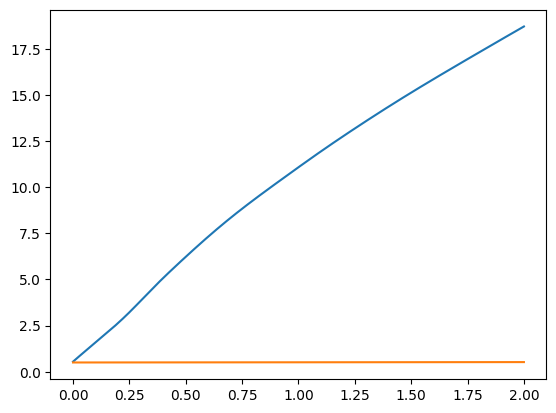

In [70]:
f0 = 1
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.01
training_steps = 50
batch_size = 100
display_step = 10
# Network Parameters
n_input = 2     # input layer number of neurons
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons
weights = {
'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_output]))
}
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Create model
def multilayer_perceptron(x):
  x = np.array([[[x]]],  dtype='float32')
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_2, weights['out']) + biases['out']
  return output
# Universal Approximator
def g(beta, T):
    x = np.array([beta, T])
    #return x * multilayer_perceptron(x)
    return multilayer_perceptron(x)
# Given EDO
tau = 365.

def beta_eq(T):
    return (35 - T)/T
def T(t):
    return math.exp(-(t - 180)**2/(2*80**2))/(math.sqrt(2*math.pi)*80)*300*5*2.6 + 5 
def dbeta(beta, t):
    return 1/tau*(beta_eq(T(t)) - beta[0])
def dbeta_hat(beta, t):
    return g(beta[0], T(t))
    
sys = [dbeta]    

def f(x):
  return 2*x
# Custom loss function to approximate the derivatives
"""
def custom_loss():
  summation = []
  t_max=1.0
  N=50
  beta0=np.array([0.5])
  cn_solver = cnc.CrankNicolson(sys, beta0, t_max, N)
  cn_solver.compute_solution()
  t, beta = cn_solver.get_solution()
  sys_hat=[dbeta_hat]
  cn_solver_hat = cnc.CrankNicolson(sys_hat, beta0, t_max, N)
  cn_solver_hat.compute_solution()
  t, beta_hat = cn_solver_hat.get_solution()
  for i in range(len(beta)):
      summation.append( ( beta[i] - beta_hat[i] )**2 )
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))
"""

t_max=2.0
N=500
beta0=np.array([0.5])
cn_solver = cnc.CrankNicolson(sys, beta0, t_max, N)
cn_solver.compute_solution()
t, beta = cn_solver.get_solution()
dt = t_max /N

def custom_loss():
    curr_beta = beta0[0]
    next_beta = curr_beta
    summation = []
    for i in range(len(beta)):
        x = np.array([curr_beta, T(i*dt)])
        next_beta = curr_beta + dt * multilayer_perceptron( x )
        summation.append( dt*(beta[i] - next_beta)**2 )
        curr_beta = next_beta
    return tf.sqrt(tf.reduce_sum(tf.abs(summation)))

def train_step():
    with tf.GradientTape() as tape:
        loss = custom_loss()
    trainable_variables=list(weights.values())+list(biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))
# Training the Model:
for i in range(training_steps):
  train_step()
  if i % display_step == 0:
    print("loss: %f " % (custom_loss()))

summation = [beta0[0]]
curr_beta = beta0[0]
beta_hat = np.zeros(beta.shape[1])
for i in range(beta.shape[1]):
    # x = np.array([curr_beta, T(i*dt)])
    # print(curr_beta)
    next_beta = curr_beta + dt * g( curr_beta, T(dt*i) ).numpy()[0][0][0][0]
    beta_hat[i] = next_beta
    curr_beta = next_beta
    
plt.plot(t, beta_hat)

cn_solver.plot_solutions("soluzione vera")


In [24]:
for i in range(len(t)):
  print(beta_hat[i] - )

0.4825128479003906
0.4651818313598633
0.4480051326751709
0.430980899810791
0.4141072311401367
0.3973822078704834
0.38080386734008786
0.36437023735046387
0.3480793170928955
0.33192909240722657
0.3159175395965576
0.3000426187515259
0.2843022880554199
0.2686945009231567
0.2532172117233276
0.23786837673187253
0.22264595508575435
0.2075479173660278
0.19257223510742183
0.17771689987182612
0.16297991180419916
0.1483592853546142
0.1338530597686767
0.11945928096771234
0.105176022529602
0.09100137138366693
0.07693344402313226
0.06297037792205805
0.049110332489013614
0.035351491928100526
0.021692068099975526
0.008130294799804627
-0.005335564613342347
-0.018707216262817447
-0.03198635101318366
-0.045174619674682684
-0.058273648262024
-0.07128503608703621
-0.08421035671234138
-0.09705115127563484
-0.10980893421173103
-0.12248519325256355
-0.13508138465881356
-0.14759894275665292
-0.1600392656326295
-0.17240372848510752
-0.18469368076324472
-0.19691043949127207
-0.20905530071258555
-0.22112953186035